# Imports

In [1]:
import requests
from json import dumps
from http import HTTPStatus
import pandas as pd
import matplotlib.pyplot as plt

# Activity 1

## 1.1 Sub-activity: Open Data COVID-19 API

### Task 1

In [2]:
def get_API_data(filters, structure):
    
    # Creating the filter list e.g. ['areaType=nation',...]
    filter_list = []
    for key in filters:
        filter_list.append('{}={}'.format(key,filters[key]))


    # Creating the filter string e.g. "filters=areaType=nation&"
    filter_string = ';'.join(filter_list)
    filter_string = 'filters='+filter_string+'&'

    # Creating the structure string e.g. "structure={"date":"date","name":"areaName",...}
    structure_string = 'structure={}'.format(dumps(structure, separators=(",", ":")))

    
    # Initializing page number
    page_num = 1
    # Initializing the data list 
    data = list()
    
    while True:
        # Creating the url using the filter string and the structute string created above
        url = ('https://api.coronavirus.data.gov.uk/v1/data?'+ filter_string + structure_string +'&page={}'.format(page_num))
        
        # Getting the response
        response = requests.get(url, timeout=10)
        
        # In case of an error, a message appears
        if response.status_code >= HTTPStatus.BAD_REQUEST:
            raise RuntimeError(f'Request failed: {response.text}')
        elif response.status_code == HTTPStatus.NO_CONTENT:
            break
            
        # Getting the data and adding them to the data list 
        current_data = response.json()
        page_data: List[StructureType] = current_data['data']
        data.extend(page_data)
        
        # If there are no more data next break
        if current_data["pagination"]["next"] is None:
            break
            
        # Increasing the page number by one, in order to get all the pages eventually    
        page_num += 1
    
    return data

### Task 2

In [3]:
# Defining structure and filters
structure = {"date":"date", 
            "name":"areaName", 
            "daily_cases":"newCasesBySpecimenDate",
            "cumulative_cases":"cumCasesBySpecimenDate",
            "daily_deaths": "newDeaths28DaysByPublishDate",
            "cumulative_deaths": "cumDeaths28DaysByPublishDate",
            "cumulative_vaccinated": "cumPeopleVaccinatedCompleteByVaccinationDate",
            "vaccination_age":"vaccinationsAgeDemographics"}

filters_national = {"areaType": "nation"}
filters_regional = {"areaType": "region"}

In [4]:
# Assigning the list of national data retrieved to a variable
results_json_national = get_API_data(filters_national,structure)


In [5]:
# Assigning the list of regional data retrieved to a variable
results_json_regional = get_API_data(filters_regional,structure)


## 1.2 Sub-activity: Shaping the COVID data into different dataframes

### Task 3

In [6]:
# Concatenating the two lists of dictionaries (results json national and results json regional) into a single list.
list_national_regional = results_json_national + results_json_regional


### Task 4

In [7]:
# Creating the dataframe which includes the data retrieved from the API
covid_data = pd.DataFrame(list_national_regional)
covid_data.head()


,date,name,daily_cases,cumulative_cases,daily_deaths,cumulative_deaths,cumulative_vaccinated,vaccination_age
0,2022-12-14,England,3393.0,20350226.0,NaN,NaN,41983471.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
1,2022-12-13,England,5510.0,20346833.0,NaN,NaN,41982966.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
2,2022-12-12,England,5669.0,20341323.0,NaN,NaN,41982478.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
3,2022-12-11,England,3932.0,20335654.0,NaN,NaN,41982091.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
4,2022-12-10,England,3071.0,20331722.0,NaN,NaN,41981702.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."


### Task 5

In [8]:
# Erasing all rows in which the name column has the value “England”
covid_data = covid_data[covid_data['name'] != 'England']
covid_data.head()


,date,name,daily_cases,cumulative_cases,daily_deaths,cumulative_deaths,cumulative_vaccinated,vaccination_age
1050,2022-05-20,Northern Ireland,NaN,NaN,0.0,3445.0,NaN,[]
1051,2022-05-19,Northern Ireland,190.0,713294.0,4.0,3445.0,NaN,[]
1052,2022-05-18,Northern Ireland,266.0,713104.0,1.0,3441.0,NaN,[]
1053,2022-05-17,Northern Ireland,318.0,712838.0,2.0,3440.0,NaN,[]
1054,2022-05-16,Northern Ireland,356.0,712520.0,1.0,3438.0,NaN,[]


### Task 6

In [9]:
# Changing the name of the column "name" to "area"
covid_data = covid_data.rename(columns={"name":"area"})
covid_data.head()


,date,area,daily_cases,cumulative_cases,daily_deaths,cumulative_deaths,cumulative_vaccinated,vaccination_age
1050,2022-05-20,Northern Ireland,NaN,NaN,0.0,3445.0,NaN,[]
1051,2022-05-19,Northern Ireland,190.0,713294.0,4.0,3445.0,NaN,[]
1052,2022-05-18,Northern Ireland,266.0,713104.0,1.0,3441.0,NaN,[]
1053,2022-05-17,Northern Ireland,318.0,712838.0,2.0,3440.0,NaN,[]
1054,2022-05-16,Northern Ireland,356.0,712520.0,1.0,3438.0,NaN,[]


### Task 7

In [10]:
# Converting the column date from object to the datetime type
covid_data["date"] = pd.to_datetime(covid_data["date"])
covid_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12230 entries, 1050 to 13279
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   12230 non-null  datetime64[ns]
 1   area                   12230 non-null  object        
 2   daily_cases            12219 non-null  float64       
 3   cumulative_cases       12218 non-null  float64       
 4   daily_deaths           10242 non-null  float64       
 5   cumulative_deaths      10254 non-null  float64       
 6   cumulative_vaccinated  7254 non-null   float64       
 7   vaccination_age        12230 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 859.9+ KB


In [11]:
# Sorting the values based on date
covid_data = covid_data.sort_values('date',ascending=True, ignore_index=True)
covid_data.head()


,date,area,daily_cases,cumulative_cases,daily_deaths,cumulative_deaths,cumulative_vaccinated,vaccination_age
0,2020-01-30,Yorkshire and The Humber,1.0,1.0,NaN,NaN,NaN,[]
1,2020-01-31,Yorkshire and The Humber,0.0,1.0,NaN,NaN,NaN,[]
2,2020-02-01,Yorkshire and The Humber,0.0,1.0,NaN,NaN,NaN,[]
3,2020-02-02,Yorkshire and The Humber,0.0,1.0,NaN,NaN,NaN,[]
4,2020-02-02,North West,1.0,1.0,NaN,NaN,NaN,[]


### Task 8

In [12]:
# Using the describe(), isnull() and sum() methods to provide a summary of the missing values
covid_data.describe()
covid_data.isnull().sum()

# This is the summary of the missing values for each column. 
# It is calculated by using the method isnull() to find the missing values 
# and the method sum() to find their sum for each column


date                        0
area                        0
daily_cases                11
cumulative_cases           12
daily_deaths             1988
cumulative_deaths        1976
cumulative_vaccinated    4976
vaccination_age             0
dtype: int64

### Task 9

In [13]:
# Sorting the data by area and then by date
covid_data = covid_data.sort_values(by=['area','date'])
covid_data.tail()


,date,area,daily_cases,cumulative_cases,daily_deaths,cumulative_deaths,cumulative_vaccinated,vaccination_age
12185,2022-12-11,Yorkshire and The Humber,272.0,1958511.0,0.0,17833.0,4028573.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
12191,2022-12-12,Yorkshire and The Humber,432.0,1958943.0,0.0,17833.0,4028607.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
12208,2022-12-13,Yorkshire and The Humber,423.0,1959366.0,0.0,17833.0,4028645.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
12213,2022-12-14,Yorkshire and The Humber,299.0,1959665.0,0.0,17833.0,4028694.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
12224,2022-12-15,Yorkshire and The Humber,NaN,NaN,50.0,17883.0,NaN,[]


In [14]:
# Replacing missing values with the most recent existing values for that area
covid_data['cumulative_cases'] = covid_data.groupby('area')['cumulative_cases'].ffill()
covid_data['cumulative_deaths'] = covid_data.groupby('area')['cumulative_deaths'].ffill()
covid_data['cumulative_vaccinated'] = covid_data.groupby('area')['cumulative_vaccinated'].ffill()


In [15]:
# Checking to see if the values have been filled
covid_data.isnull().sum()


date                        0
area                        0
daily_cases                11
cumulative_cases            0
daily_deaths             1988
cumulative_deaths        1776
cumulative_vaccinated    4873
vaccination_age             0
dtype: int64

### Task 10

In [16]:
# Removing the rows that still have missing values in the cumulative metrics columns mentioned in the last question
covid_data = covid_data.dropna(axis=0, subset=['cumulative_cases'])
covid_data = covid_data.dropna(axis=0, subset=['cumulative_deaths'])
covid_data = covid_data.dropna(axis=0, subset=['cumulative_vaccinated'])


In [17]:
# Checking to see whether the rows with the missing values in the cumulatve metrics have been removed
covid_data.isnull().sum()


date                       0
area                       0
daily_cases               10
cumulative_cases           0
daily_deaths             194
cumulative_deaths          0
cumulative_vaccinated      0
vaccination_age            0
dtype: int64

### Task 11

In [18]:
# Calculating the rolling averages for the daily_cases and daily_deaths columns
covid_data['daily_cases_roll_avg'] = covid_data.groupby('area')['daily_cases'].apply(lambda x: x.rolling(7, 1).mean())
covid_data['daily_deaths_roll_avg'] = covid_data.groupby('area')['daily_deaths'].apply(lambda x: x.rolling(7, 1).mean())

covid_data.head()

,date,area,daily_cases,cumulative_cases,daily_deaths,cumulative_deaths,cumulative_vaccinated,vaccination_age,daily_cases_roll_avg,daily_deaths_roll_avg
3591,2020-12-08,East Midlands,1420.0,151661.0,64.0,4868.0,528.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",1420.00,64.00
3598,2020-12-09,East Midlands,1410.0,153071.0,56.0,4924.0,539.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",1415.00,60.00
3612,2020-12-10,East Midlands,1451.0,154522.0,39.0,4963.0,548.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",1427.00,53.00
3632,2020-12-11,East Midlands,1444.0,155966.0,38.0,5001.0,562.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",1431.25,49.25
3643,2020-12-12,East Midlands,1035.0,157001.0,65.0,5066.0,562.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",1352.00,52.40


### Task 12

In [19]:
# Dropping the columns daily_cases and daily_deaths
covid_data.drop(['daily_cases', 'daily_deaths'], axis=1, inplace=True)
covid_data.head()


,date,area,cumulative_cases,cumulative_deaths,cumulative_vaccinated,vaccination_age,daily_cases_roll_avg,daily_deaths_roll_avg
3591,2020-12-08,East Midlands,151661.0,4868.0,528.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",1420.00,64.00
3598,2020-12-09,East Midlands,153071.0,4924.0,539.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",1415.00,60.00
3612,2020-12-10,East Midlands,154522.0,4963.0,548.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",1427.00,53.00
3632,2020-12-11,East Midlands,155966.0,5001.0,562.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",1431.25,49.25
3643,2020-12-12,East Midlands,157001.0,5066.0,562.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",1352.00,52.40


### Task 13

In [20]:
# Creating a new dataframe which contains only the columns date, area and vaccination_age
covid_data_vaccinations = pd.DataFrame(covid_data[['date','area','vaccination_age']])
# Dropping the vaccination_age column from the covid_data dataframe
covid_data.drop(['vaccination_age'], axis=1, inplace=True)
covid_data_vaccinations.head()


,date,area,vaccination_age
3591,2020-12-08,East Midlands,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
3598,2020-12-09,East Midlands,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
3612,2020-12-10,East Midlands,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
3632,2020-12-11,East Midlands,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
3643,2020-12-12,East Midlands,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."


### Task 14

In [21]:
# Initialising an empty list
listt = []
# Initialising an empty dictionary
dictt ={}
# Initialising an empty list for each row
rows = []
# Converting the dataframe covid_data_vaccinations to a dictionary
dictt3 = covid_data_vaccinations.to_dict(orient='records')
# For every record in the dictionary
for rec in dictt3:
    # Getting the date of the record
    date = rec['date']
    # Getting the area of the record
    area = rec['area']
    # Assigning the vaccination_age list to another list called data_row
    data_row = rec['vaccination_age']
    # For every row in the data_row
    for row in data_row:
        # Adding a new key called date with the value date
        row['date'] = date
        # Adding a new key called area with the value area
        row['area'] = area
        # Appending each rows to the list rows
        rows.append(row)
    
        
# Creating a dataframe using the list rows as data
covid_data_vaccinations_wide = pd.DataFrame(rows)
# Getting only the appropriate columns
covid_data_vaccinations_wide = covid_data_vaccinations_wide[['date', 'area', 'age','VaccineRegisterPopulationByVaccinationDate',
                                                            'cumPeopleVaccinatedCompleteByVaccinationDate','newPeopleVaccinatedCompleteByVaccinationDate',
                                                            'cumPeopleVaccinatedFirstDoseByVaccinationDate','newPeopleVaccinatedFirstDoseByVaccinationDate','cumPeopleVaccinatedSecondDoseByVaccinationDate',
                                                             'newPeopleVaccinatedSecondDoseByVaccinationDate','cumVaccinationFirstDoseUptakeByVaccinationDatePercentage','cumVaccinationCompleteCoverageByVaccinationDatePercentage',
                                                             'cumVaccinationSecondDoseUptakeByVaccinationDatePercentage'
                                                            ]]

covid_data_vaccinations_wide.tail(20)

,date,area,age,VaccineRegisterPopulationByVaccinationDate,cumPeopleVaccinatedCompleteByVaccinationDate,newPeopleVaccinatedCompleteByVaccinationDate,cumPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate,cumVaccinationFirstDoseUptakeByVaccinationDatePercentage,cumVaccinationCompleteCoverageByVaccinationDatePercentage,cumVaccinationSecondDoseUptakeByVaccinationDatePercentage
140726,2022-12-14,Yorkshire and The Humber,05_11,485917.0,29291.0,20.0,46909.0,9.0,29291.0,20.0,9.7,6.0,6.0
140727,2022-12-14,Yorkshire and The Humber,12_15,285188.0,104430.0,11.0,140153.0,1.0,104430.0,11.0,49.1,36.6,36.6
140728,2022-12-14,Yorkshire and The Humber,16_17,136065.0,67324.0,5.0,86605.0,0.0,67324.0,5.0,63.6,49.5,49.5
140729,2022-12-14,Yorkshire and The Humber,18_24,522251.0,343115.0,9.0,381078.0,4.0,343115.0,9.0,73.0,65.7,65.7
140730,2022-12-14,Yorkshire and The Humber,25_29,411102.0,265346.0,4.0,286498.0,5.0,265346.0,4.0,69.7,64.5,64.5
140731,2022-12-14,Yorkshire and The Humber,30_34,432045.0,292264.0,6.0,311540.0,7.0,292264.0,6.0,72.1,67.6,67.6
140732,2022-12-14,Yorkshire and The Humber,35_39,415673.0,298590.0,2.0,313632.0,3.0,298590.0,2.0,75.5,71.8,71.8
140733,2022-12-14,Yorkshire and The Humber,40_44,384031.0,295400.0,1.0,306776.0,1.0,295400.0,1.0,79.9,76.9,76.9
140734,2022-12-14,Yorkshire and The Humber,45_49,346579.0,284519.0,3.0,292148.0,1.0,284519.0,3.0,84.3,82.1,82.1
140735,2022-12-14,Yorkshire and The Humber,50+,2240016.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN


## 1.3 Sub-activity: Aggregating, plotting, and analysing

### Task 15

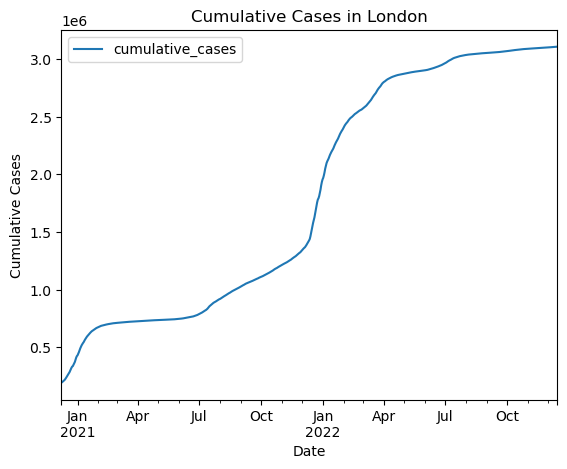

In [22]:
# 1. intermidiate dataframe
intermidiate_df15 = covid_data[covid_data['area'] == 'London'][['date','cumulative_cases']]
intermidiate_df15.set_index('date',inplace=True)

# 2. plot
ax = intermidiate_df15.plot(xlabel='Date', ylabel='Cumulative Cases', title="Cumulative Cases in London")

# 3. answer
# It seems that from February 2021 to July 2021 the cumulatice cases stopped increasing. From July 2021 and later
# the cumulative cases started to increase again.


### Task 16

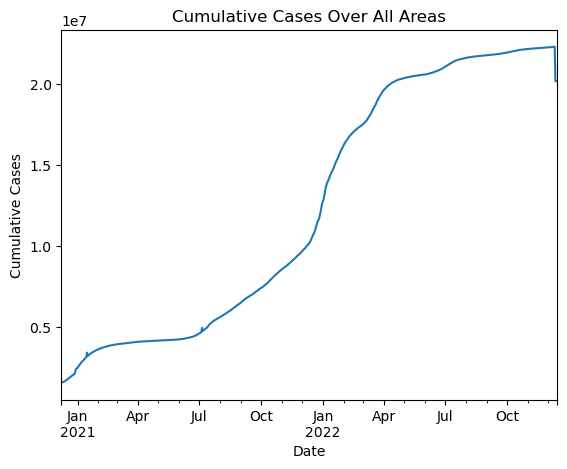

In [38]:
# 1. intermidiate dataframe
intermidiate_df16 = covid_data.groupby('date').sum()
intermidiate_df16 = intermidiate_df16['cumulative_cases']
intermidiate_df16

# 2. plot
ax = intermidiate_df16.plot(xlabel='Date', ylabel='Cumulative Cases', title='Cumulative Cases Over All Areas')


# 3. answer
# The pattern of the cumulative cases in London is almost identical to the country-wide pattern. 
# The only difference is located at the end of 2022, where the cumulative cases country-wide 
# drops sharply.


### Task 17

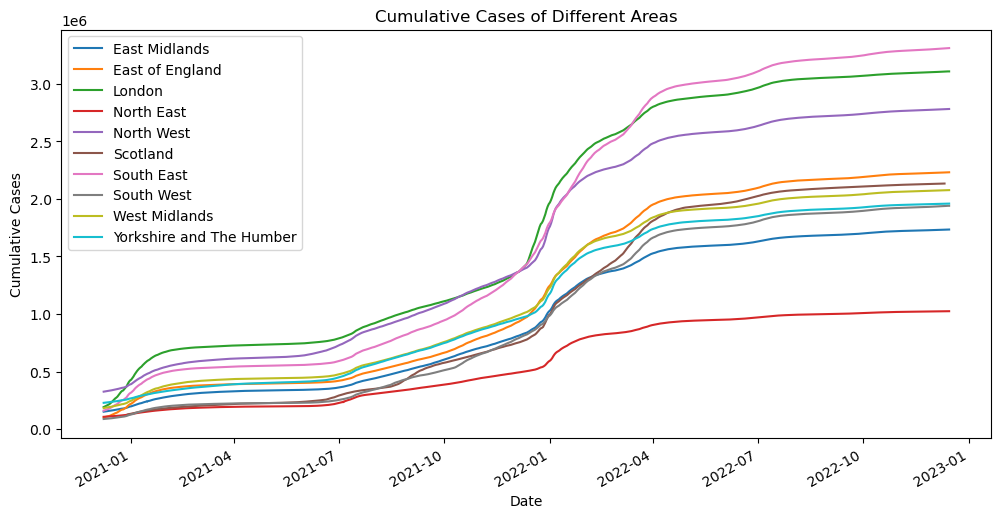

In [24]:
# 1. intermidiate dataframe
intermidiate_df17 = covid_data.set_index('date')
intermidiate_df17 = intermidiate_df17.groupby('area')['cumulative_cases']
intermidiate_df17.head()

# 2. plot
ax = intermidiate_df17.plot.line(xlabel="Date", ylabel="Cumulative Cases", title = "Cumulative Cases of Different Areas",figsize=(12,6), legend = True)

# 3. answer
# It seems that all the countries follow the same pattern when it comes to the cumulative cases over time.
# The cumulative cases of all the areas stopped increasing from February 2021 to July 2021 and started increasing 
# again from July 2021 and onwards. Also the increase on January 2022 seem to be sharpened for all the areas
# and the increase rate on March 2022 has decreased.

### Task 18

In [25]:
# answer

# The event that could have taken place in June-July 2021 that could justify the upward trend 
# is the ease of restrictions in England.


### Task 19

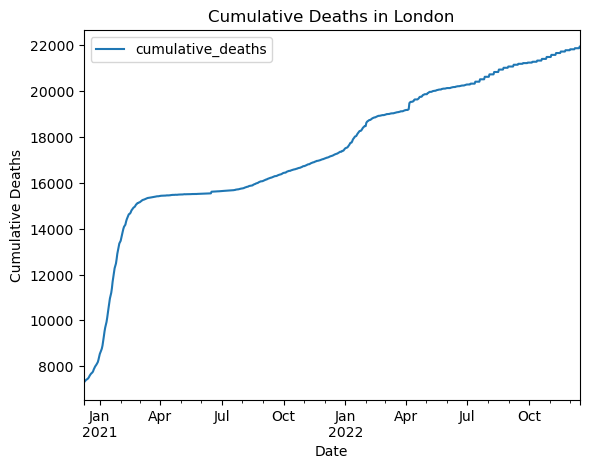

In [26]:
# 1. intermidiate dataframe
intermidiate_df19 = covid_data[covid_data['area'] == 'London'][['date','cumulative_deaths']]
intermidiate_df19.set_index('date',inplace=True)

# 2. plot
ax = intermidiate_df19.plot(xlabel='Date', ylabel='Cumulative Deaths', title="Cumulative Deaths in London")

# 3. answer
# There is a noticeable break in the ongoing trend between March 2021 and August 2021.


### Task 20

In [27]:
# answer

# There is a similarity between the trends in cumulative cases and cumularive deaths. Both have stoped increasing 
# from around March 2021 until around August 2021. They start increasing from August 2021 onwards.


### Task 21

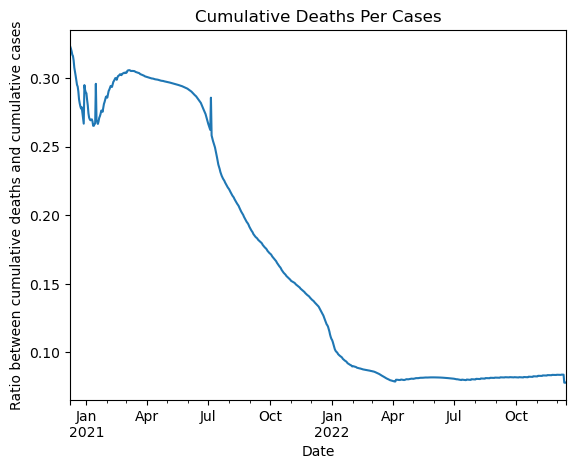

In [28]:
# Calculating the ratio between cumulative deaths and cumulative cases in each row
covid_data['cumulative_deaths_per_cases'] = covid_data['cumulative_deaths']/covid_data['cumulative_cases']

# 1. intermidiate dataframe
intermidiate_df21 = covid_data.groupby('date').sum()
intermidiate_df21 = intermidiate_df21['cumulative_deaths_per_cases']
intermidiate_df21

# 2. plot
ax = intermidiate_df21.plot(xlabel='Date', ylabel='Ratio between cumulative deaths and cumulative cases', title='Cumulative Deaths Per Cases')


# 3. answer
# The ratio between cumulative deaths and cumulative cases had a slight downward trend from December 2020 to January 2021,
# a small upward trend from March 2021 to April 2021 and then a massive downward trend from April 2021 to April 2022.
# Also, the line plot shows that from April 2022 to December 2022, tha ratio remained the same.

### Task 22

In [29]:
# answer

# It can be noticed that in June-July 2021, the slope of the graph gets steeper. A reasonable explanation
# for this could be that the the cumulative cases had increased a lot these months and therefore the ratio between
# cumulative deaths and cumulative cases had decreased.


### Task 23

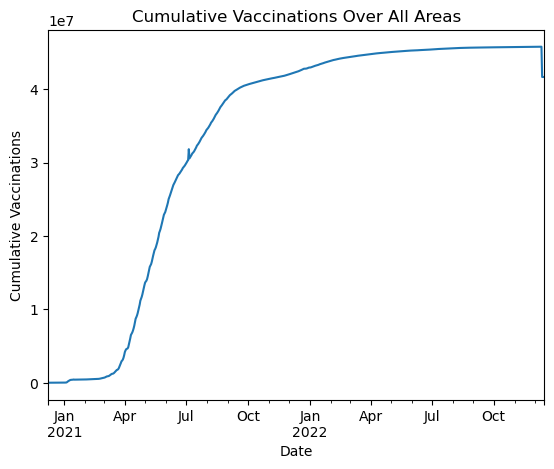

In [30]:
# 1. intermidiate dataframe
intermidiate_df23 = covid_data.groupby('date').sum()
intermidiate_df23 = intermidiate_df23['cumulative_vaccinated']
intermidiate_df23

# 2. plot
ax = intermidiate_df23.plot(xlabel='Date', ylabel='Cumulative Vaccinations', title='Cumulative Vaccinations Over All Areas')


# 3. answer
# The trend of the graph showing the ratio between cumulative deaths and cumulative cases follows a downward trend,
# while the trend of the graph showing the cumulative vaccinations, follows an upward trend. The trends are opposite, 
# which means as more people were getting vaccinated, the ratio between cumulative deaths and cumulative 
# cases was decreasing. 

### Task 24

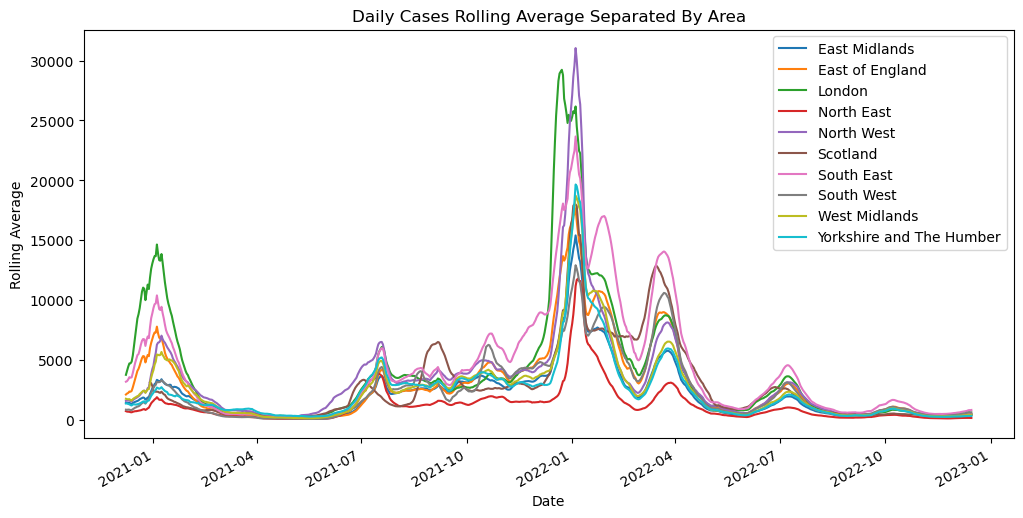

In [31]:
# 1. intermidiate dataframe
intermidiate_df24 = covid_data.set_index('date')
intermidiate_df24 = intermidiate_df24.groupby('area')['daily_cases_roll_avg']
intermidiate_df24.head()

# 2. plot
ax = intermidiate_df24.plot(xlabel="Date", ylabel="Rolling Average", title = "Daily Cases Rolling Average Separated By Area",figsize=(12,6), legend = True)

# 3. answer
# The area that seems to escape the general trend is Scotland as seen in February and March 2022. 
# During this period, most areas follow a peak in daily cases, followed by a downfall towards April 2022, 
# whereas the Scotland plot levels off into April 2022 without showing any significant peak in a particular direction.
# This is also the case between October 2021 through November 2021, where no peak in daily cases is observed in Scotland.

### Task 25

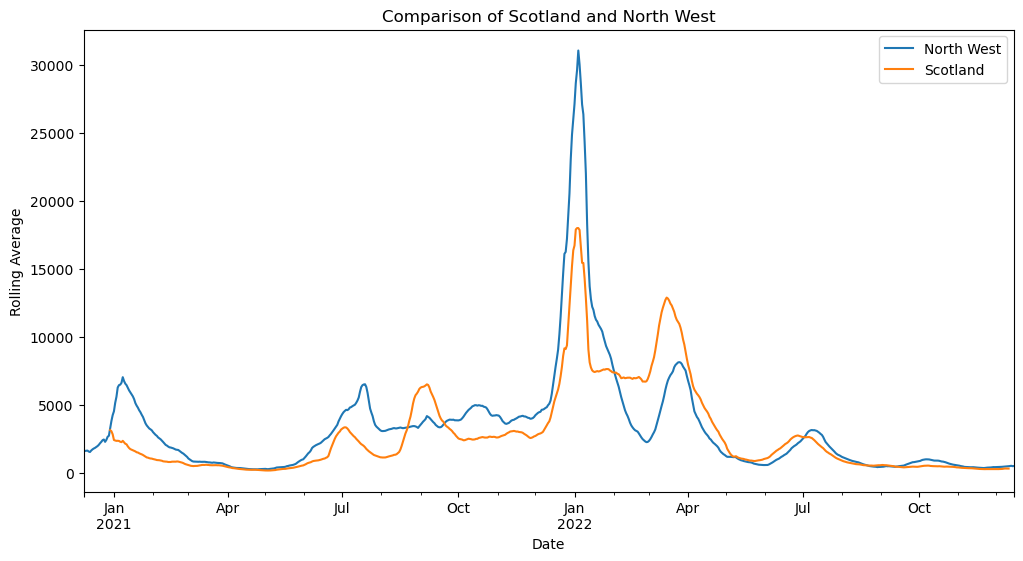

In [32]:
# 1. intermidiate dataframe
intermidiate_df25 = covid_data.set_index('date')
intermidiate_df25 = intermidiate_df25[intermidiate_df25.area.isin(['Scotland', 'North West'])].groupby('area')['daily_cases_roll_avg']

# 2. plot
ax = intermidiate_df25.plot(xlabel="Date", ylabel="Rolling Average", title = "Comparison of Scotland and North West",figsize=(12,6), legend = True)

# 3. answer
# There must have been issues in the collection of data for scotland, as a result keeping the daily cases the same.
# This may be a reason that Scotland roughly levels off in the periods of October 2021 to November 2021 and February 2022
# to March 2022.

### Task 26

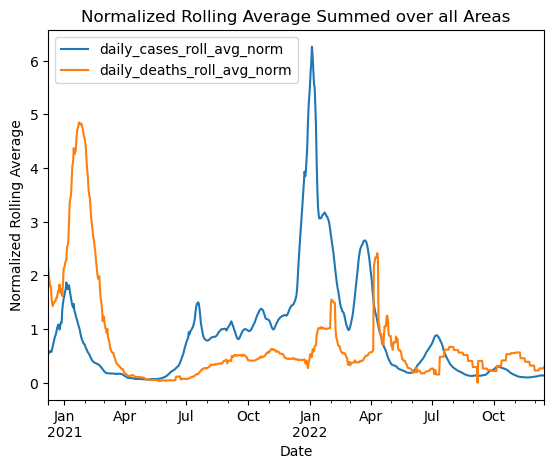

In [37]:
covid_data['daily_cases_roll_avg_norm'] = covid_data['daily_cases_roll_avg'] / covid_data['daily_cases_roll_avg'].max()
covid_data['daily_deaths_roll_avg_norm'] = covid_data['daily_deaths_roll_avg'] / covid_data['daily_deaths_roll_avg'].max()
covid_data.head()

# 1. intermidiate dataframe
intermidiate_df26 = covid_data.groupby('date').sum()
intermidiate_df26 = intermidiate_df26[['daily_cases_roll_avg_norm','daily_deaths_roll_avg_norm']]

# 2. plot
ax = intermidiate_df26.plot.line(xlabel="Date", ylabel="Normalized Rolling Average", title = "Normalized Rolling Average Summed over all Areas", legend = True)

# 3. answer
# Daily trends of cases and deaths are not increasing and decreasing at the same 
# rates. This can be identified by looking at the slope of the line plots of the 
# daily cases and deaths and comparing the rate at which they peak. For example, 
# as observed during April 2022 the rate at which daily deaths reaches its peak 
# is much higher than the rate of daily cases, since the slope is much steeper.

### Task 27

<AxesSubplot:title={'center':' First Dose Vaccination Coverage Per Age Group in London'}, xlabel='Date', ylabel='Vaccination Coverage (%)'>

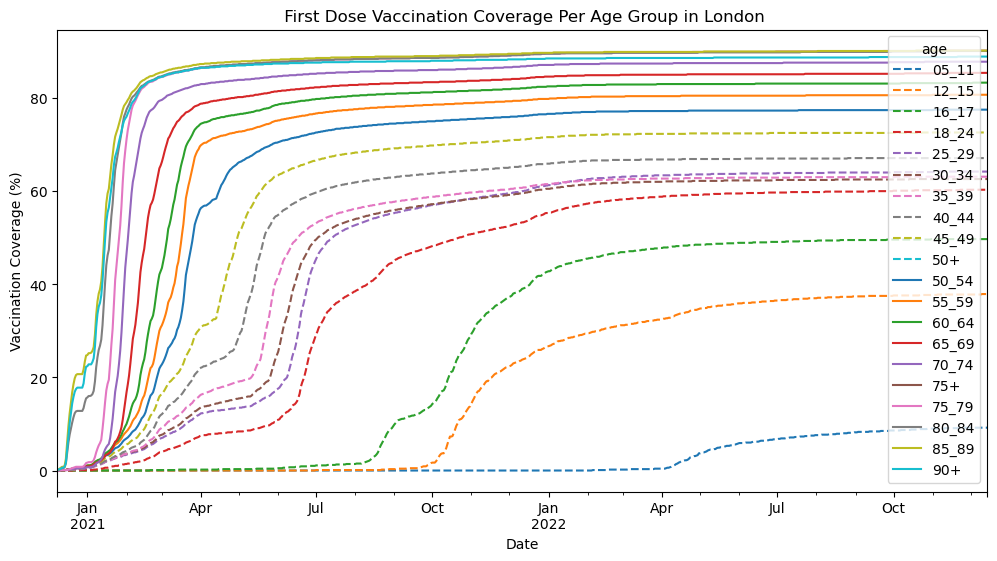

In [34]:
# spliting covid_data_vaccinations_wide into two dataframes, one for London, one for Scotland
covid_data_vaccinations_wide_London = covid_data_vaccinations_wide[covid_data_vaccinations_wide['area']=='London']
covid_data_vaccinations_wide_Scotland = covid_data_vaccinations_wide[covid_data_vaccinations_wide['area']=='Scotland']

# Intermediate Dataframe

covid_data_vaccinations_wide_London_B = covid_data_vaccinations_wide_London[['date','age','cumVaccinationFirstDoseUptakeByVaccinationDatePercentage']]

# pivoting the dataframe
covid_data_vaccinations_wide_London_B = covid_data_vaccinations_wide_London_B.pivot(index='date', columns='age', values='cumVaccinationFirstDoseUptakeByVaccinationDatePercentage')

# Plot
covid_data_vaccinations_wide_London_B.plot(style=['--' for _ in range(10)], xlabel="Date", ylabel="Vaccination Coverage (%)", title = " First Dose Vaccination Coverage Per Age Group in London",figsize=(12,6), legend = True)

# Answer

# Based on the line plot, it seems there was a strategy employed when it came to the 
# vaccination. The higher the age-group, the higher the percentage of people that
# got vaccinated, and at a much faster rate.

# There is a significant increase of the vaccinations of the older people at the 
# age 50 and higher in the first few months Jan - Apr 2021 while the vaccinations 
# of younger people started to increase in the later months. Also the percentage 
# of vaccination coverage as the age decreases is lesser.

# To conclude, the strategy that the plot indicates is to vaccinate the older
# population as early as possible and to vaccinate at least 80%-90% of the population.
# As the age group becomes younger, the desired population to vaccinate becomes less
# and the rate at which the estimated population is fully vaccinated is reduced to
# fully vaccinated within the first year, compared to within a few months for the
# elderly.


### Task 28

<AxesSubplot:title={'center':' First Dose Vaccination Coverage Per Age Group in Scotland'}, xlabel='Date', ylabel='Vaccination Coverage (%)'>

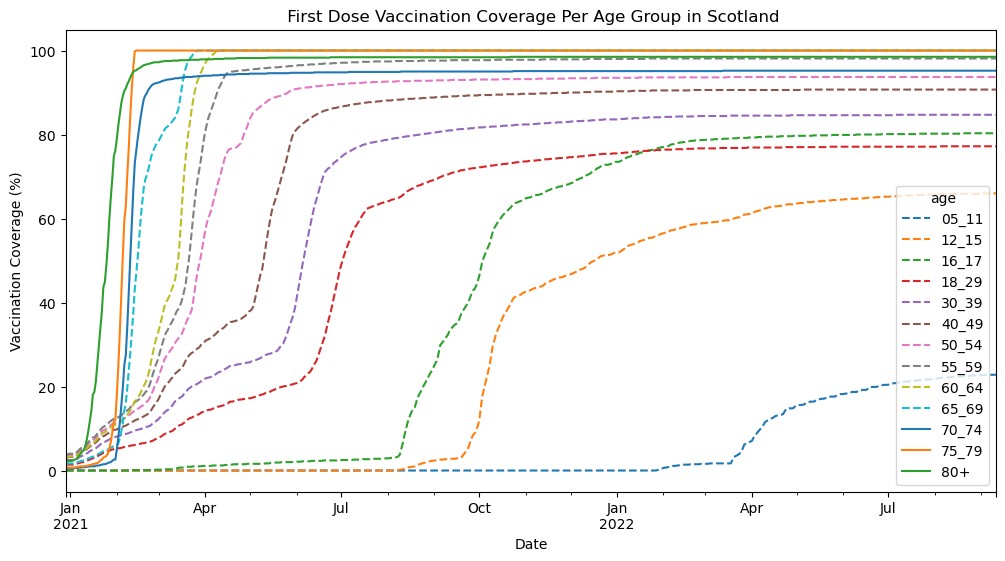

In [35]:
# 1. Intermediate Dataframe

covid_data_vaccinations_wide_Scotland_B = covid_data_vaccinations_wide_Scotland[['date','age','cumVaccinationFirstDoseUptakeByVaccinationDatePercentage']]

# pivoting the dataframe
covid_data_vaccinations_wide_Scotland_B = covid_data_vaccinations_wide_Scotland_B.pivot(index='date', columns='age', values='cumVaccinationFirstDoseUptakeByVaccinationDatePercentage')

# 2. Plot
covid_data_vaccinations_wide_Scotland_B.plot(style=['--' for _ in range(10)], xlabel="Date", ylabel="Vaccination Coverage (%)", title = " First Dose Vaccination Coverage Per Age Group in Scotland", figsize=(12,6), legend = True)

# 3. Answer
# The strategy of Scotland for the population 50-64 years was to vaccinate 90-100% of the age groups.  
# On the other hand, the same population age in London the strategy was to only vaccinate 70-80% of the age group.

# When it comes to the vaccination of the population 65-79, Scotland covered 90-100% of the population,
# whereas London only covered 80-90% of the same age group.